# Tracker tutorial
This repository is an implementation of a paper "On Tracking The Partition Function" by G. Desjardins et al. They developed a method to track partition function of RBM. Even though it is generally impossible to calculate partition function of large RBM, they make it feasible by using Kalman filter. The method track partition function of large RBM by modifying the estimate of partition function a little by little following the learning of RBM. I implemented the partition function tracker using Kalman filter described in the paper as a "tracker" module. 
Here I will go through basic usage of the module.

Before we begin this tutorial, you need to compile the tracker module first. See README.md for compilation.

## 1. Simple usage on toy model
First I show basic usage of tracker module by measuring the partition function of RBM with constantly changing parameter. This will illustrate how to use a class "tracker.PyTracker" and functions "tracker.py_lpf_ais" and "tracker.py_lpf_det".

We must import related libraries first.

In [1]:
import os
import sys
import time
import tracker
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Then define initial parameter of RBM. Parameter of RBM consists of visible unit bias "b", hidden unit bias "c" and connection weight matrix "w". Define these variables as in usual RBM initialization.

In [2]:
n_vis = 100
n_hid = 10
b = np.zeros(n_vis)
c = np.zeros(n_hid)
scale = 4 * np.sqrt(6 / (n_vis + n_hid))
w = np.random.uniform(low=-scale, high=scale, size=(n_vis, n_hid))

Before we begin tracking partition function, we must instantiate PyTracker class. Instantiation take 4 argument, "n_beta" for division of temperature, "n_batch" for batch of each temperature and "n_vis", "n_hid". You find detailed meanings of these parameters in the paper. Then we need to set parameter of the target RBM.

In [3]:
n_beta = 100
n_batch = 30
tkr = tracker.PyTracker(n_beta, n_batch, n_vis, n_hid)
tkr.set_params(b, c, w)

Since tracking uses Kalman filter, we need first estimate of partition function. First estimate can be generated by either "init_mu_p" method implementing parallel tempering or "init_ais" method implementing ais for each temperature. Since calculation is light for "init_mu_p" than "init_ais" we use "init_mu_p" here.

In [4]:
tkr.init_mu_p()

Basic work flow of tracking partition function is to update internal estimate of partition function by

which updates estimate of partition function and internal RBM parameter of PyTracker instance. Then get updated estimate by

which generates log partition function estimate and its standard deviation.

Then we begin track partition function. We increase parameter "w" for 5 epoch and decrease parameter "w" for 5 epoch and see the difference between the method, AIS and Deterministic calculation. AIS is calculated by the function "tracker.py_lpf_det" and deterministic calculation is executed by function "tracker.py_lpf_det".

In [5]:
n_epoch = 10
till_down = 5

mean_trk_list = list()
std_trk_list = list()
mean_ais_list = list()
std_ais_list = list()
mean_det_list = list()
for i in range(n_epoch):
    time.sleep(1.0)
    
    if i < till_down:
        w += 1e-4
    else:
        w -= 1e-4
    
    tkr.track(b, c, w)
    mean_trk, std_trk = tkr.get_estimates()
    mean_ais, std_ais = tracker.py_lpf_ais(b, c, w)
    mean_det = tracker.py_lpf_det(b, c, w)
    
    mean_trk_list.append(mean_trk)
    std_trk_list.append(std_trk)
    mean_ais_list.append(mean_ais)
    std_ais_list.append(std_ais)
    mean_det_list.append(mean_det)
    
    print("Finish", i, "th epoch", "mean_det", mean_det)
    print("mean_trk", mean_trk, "std_trk", std_trk)
    print("mean_ais", mean_ais, "std_ais", std_ais)

Finish 0 th epoch mean_det 101.20340189479744
mean_trk 101.22232246313007 std_trk 0.025814778884961226
mean_ais 101.23188925447809 std_ais 0.0281726166475851
Finish 1 th epoch mean_det 101.24172561405462
mean_trk 101.26859374037838 std_trk 0.03952307224193273
mean_ais 101.25976978652128 std_ais 0.015593024456813825
Finish 2 th epoch mean_det 101.28007624203049
mean_trk 101.3136004890085 std_trk 0.03179176521856739
mean_ais 101.2976139669319 std_ais 0.025968509713997737
Finish 3 th epoch mean_det 101.31845377455316
mean_trk 101.34328117353938 std_trk 0.026486353253292176
mean_ais 101.32308136283015 std_ais 0.0265722525673819
Finish 4 th epoch mean_det 101.35685820745866
mean_trk 101.38147166678218 std_trk 0.02141798983327219
mean_ais 101.31230571726638 std_ais 0.024043167688506936
Finish 5 th epoch mean_det 101.31845377455316
mean_trk 101.34703159820043 std_trk 0.020948162574684973
mean_ais 101.27971193932275 std_ais 0.029252880805388036
Finish 6 th epoch mean_det 101.28007624203049
mea

First plot tracking estimate with deterministic calculation.

Text(0,0.5,'lpf')

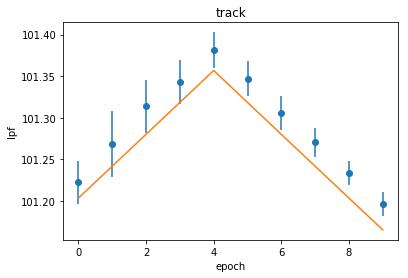

In [6]:
plt.errorbar(np.arange(n_epoch), mean_trk_list,
            yerr=std_trk_list, fmt="o")
plt.plot(mean_det_list)
plt.title("track")
plt.xlabel("epoch")
plt.ylabel("lpf")

Text(0,0.5,'lpf')

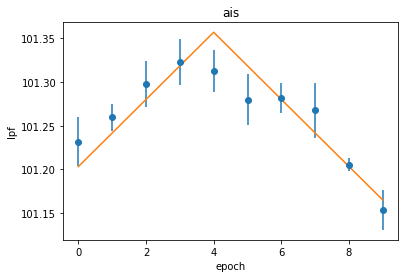

In [7]:
plt.errorbar(np.arange(n_epoch), mean_ais_list,
             yerr=std_ais_list, fmt="o")
plt.plot(mean_det_list)
plt.title("ais")
plt.xlabel("epoch")
plt.ylabel("lpf")

Following tutorial are under construction